Dans cette démo, nous allons voir comment manipuler une image à travers différentes bibliothèques que nous devons importer.

Parmi ces bibliothèques, on retrouve donc **Matplotlib**, **Numpy**, **Pillow** et **Scikit-image**.

# Importations

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
from PIL import Image
from PIL import ImageFilter
from PIL import ImageFont, ImageDraw, ImageEnhance
from skimage import io
from skimage import data
from skimage.feature import Cascade
import sys

# Création d'image avec Numpy

Les images sont en réalité des valeurs qui sont stockées dans des tableaux. Si on peut manipuler des tableaux en programmation, on peut alors aussi bien manipuler des images.
Et une bibliothèque qui est très utilisé dans la manipulation de tableau est Numpy.


Nous allons, pour commencer, créer une image pixel par pixel pour commprendre comment fonctionne le codage des images.

In [5]:
# Dimensions de l'image en pixel
largeur = 15
hauteur = 9

On choisit ici des dimensions pour notre images. Ici, on a choisit une largeur de 15 pixels, et une hauteur de 9 pixels.


Comment est codée une image ?

Voici un schéma qui résume le concept d'image :

![](schema2.png) Source : https://www.pythoninformer.com/python-libraries/numpy/numpy-and-images/

On voit donc que pour notre cas, chaque lignes est composées de 15 pixels, qui sont eux-mêmes composés de 3 bytes, donc 3 dimensions par pixels.

Avec Numpy, nous pouvons recréer de toute pièce ce système grâce à l'utilisation de tableaux. Nous allons donc initialiser un tableau Numpy avec ces dimensions et avec 3 canaux pour les 3 dimensions d'un pixel **Rouge**, **Vert** et **Bleu**.

Pour cela, on utilise la fonction **zeros** de Numpy pour initialiser un tableau remplit de 0 qui a les dimensions de l'image qu'on souhaite créer.

In [58]:
# 3 canaux pour RVB, creation d'un tableau de 0 avec des uint8
image_france = np.zeros([hauteur,largeur,3], dtype = np.uint8)

On indique donc la hauteur, largeur et enfin la dimension d'une case, donc d'un pixel qui est ici de 3. On indique également que les valeurs de ces tableaux sont des *uint8*, type d'entier qui vient du module Numpy.

Ce type d'entier est adéquat pour les images, car chaque canaux a une valeur entre 0 et 255, tout comme les entiers de types *uint8*.

On peut afficher quelques caractèristiques de ce tableau numpy :

In [37]:
print(type(image_france))

<class 'numpy.ndarray'>


Le type de ce tableau est **numpy.ndarray**, ce qui signifie que c'est un tableau multidimensionnel de Numpy.

On peut regarder les dimensions de ce tableau :

In [39]:
print(image_france.shape)

(9, 15, 3)


9 lignes, 15 colonnes et 3 canaux pour chaque pixels


Maintenant, si on veut l'afficher :

In [24]:
print(image_france[:3])

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


On affiche seulement les 3 premières lignes du tableau.

On constate qu'il y a un tableau pour chaqu'une des 3 lignes affichées (la hauteur de l'image), dans ce tableau, nous avons 15 tableaux qui correspond aux 15 colonnes de notre image (la largeur), et dans chacuns des 15 tableaux, nous avons un dernier tableau qui correspond au pixel avec 3 dimensions qui ici contient 3 zéros.

Et, le tableau principal qui contient tous ces tableaux est l'image elle-même.



Maintenant qu'on sait comment est codée une image, on va modifier ces valeurs pour former des couleurs et donc une image.

Prenons comme exemple le drapeau de la France. Les couleurs sont donc **Bleu**, **Blanc** et **Rouge**. Pour coder ces couleurs, il faut connaitre leur composition en couleurs primaires, c'est à dire Rouge Vert Bleu.

Le Rouge est codé de cette manière : [255,0,0], nous avons une valeur maximal pour le rouge, et minimale pour le Vert et Bleu, ce qui est logique car on veut du Rouge.

Pour le Blanc, on sait que ce dernier est un mélange de toutes les couleurs, donc : [255,255,255].

Enfin, pour le Bleu, comme pour le Rouge, on séléctionne uniquement le Bleu dans les canaux : [0,0,255]

In [59]:
bleu = [0,0,255]
blanc = [255,255,255]
rouge = [255,0,0]

On va maintenant modifier les valeurs de notre tableau *image*. 

Pour chaque ligne du tableau, nous allons mettre à la fois du Bleu, Blanc et du Rouge, mais à différent endroits.

Les 5 premiers pixels seront du Bleu, les 5 suivant du Blanc, et les 5 derniers du Rouge.

In [60]:
for ligne in range(hauteur):
    image_france[ligne][0:5] = bleu
    image_france[ligne][5:10] = blanc
    image_france[ligne][10:] = rouge

On affiche l'image qu'on vient de créer en utilisation la fonction *imshow* de **Matplotlib** :

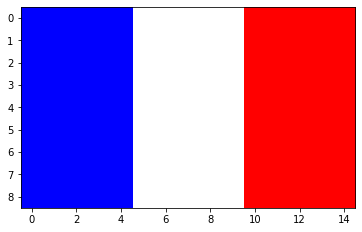

In [9]:
plt.imshow(image_france)

Nous avons réussi à créer l'image de la France pixel par pixel en modifiant les valeurs d'un tableau Numpy.

# Manipulation d'image avec Numpy et Matplotlib

Désormais, on sait comment est composée une image . On va maintenant voir quelques opérations sur les images telles que le rognage, passage en niveau de gris...


On commence par ouvrir une image avec la fonction *imread* de **Matplotlib**.

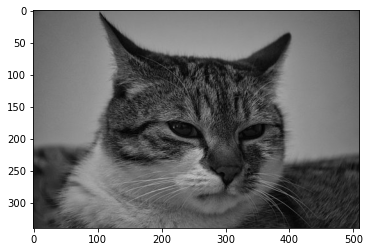

In [86]:
gray_cat = mpimg.imread("img/cat.jpg")
plt.imshow(gray_cat)

Nous avons ici ouvert une image en niveau de gris mais on peut aussi transormer une image couleur en image en niveau de gris grâce à Numpy et les manipulations des tableaux Numpy.


Essayons avec une image en couleur, on ouvre cette image avec Matplotlib :

In [10]:
img = mpimg.imread("img/gorille.jpg")

Comme précédemment, on peut afficher le contenu de cette image et le type :

In [11]:
print(type(img))
print(img)

<class 'numpy.ndarray'>
[[[ 20  20  30]
  [ 20  20  30]
  [ 19  19  29]
  ...
  [ 42  44  39]
  [ 43  45  40]
  [ 44  46  41]]

 [[ 19  19  29]
  [ 20  20  30]
  [ 19  19  29]
  ...
  [ 40  42  37]
  [ 39  41  36]
  [ 40  42  37]]

 [[ 18  18  28]
  [ 19  19  29]
  [ 19  19  29]
  ...
  [ 39  41  36]
  [ 37  39  34]
  [ 37  39  34]]

 ...

 [[ 68 129  51]
  [ 67 130  51]
  [ 68 131  52]
  ...
  [218 242  42]
  [217 241  41]
  [216 240  40]]

 [[ 68 129  51]
  [ 68 129  51]
  [ 68 131  52]
  ...
  [219 242  46]
  [219 242  46]
  [218 241  45]]

 [[ 68 129  52]
  [ 68 129  52]
  [ 69 130  52]
  ...
  [221 244  48]
  [221 244  48]
  [220 243  47]]]


On retrouve le type **numpy.ndarray** qui signifie que ce tableau Numpy est multidimensionnel.

La structure des tableaux est également similaire à notre drapeau de la France. On retrouve des lignes, des colonnes, et des pixels à trois dimensions.

On affiche les dimensions de cette image, on utilise toujours shape, car **img** est un objet Numpy :


In [19]:
print(img.shape)

(523, 1060, 3)


Dans cette image, on a donc 523 lignes composées de 1060 pixels chacunes, et chaque pixel a 3 dimensions pour les 3 couleurs Rouge Vert Bleu.


Passons maintenant à l'affichage de cette image, on procède de la même manière que pour le drapeau, on utilise la fonction imshow de Matplotlib :

Image d'origine, en couleur : 



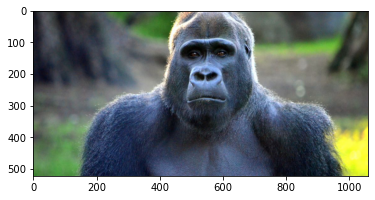

In [22]:
print("Image d'origine, en couleur : \n")
plt.imshow(img)

On veut donc passer d'une image en couleur en une image en niveau de gris. Les images en niveau de gris sont codées différemment que les images en couleurs. Ces dernières ont des pixels codés sur 3 bytes, donc 3 dimensions pour les 3 couleurs Rouge Vert Bleu. Les pixels d'une image en niveau de gris n'ont qu'une seule dimension, la lumnosité de l'image qui correspond au niveau de gris.

Pour un vrai passage de image en couleur à image en niveau de gris, il faudrait effectuer des opérations mathématiques sur chaque pixel de l'image pour transformer les 3 valeurs RVB en une seule, la luminosité.

Mais, il existe d'autres moyens plus simples mais imparfait pour obtenir une image en niveau de gris, comme garder un seul canal sur les trois de bases. Pour cela, on séléctionne toutes les lignes et toutes les colonnes mais un seul canal.

In [97]:
img_gray = img[:,:,:1]
print(img_gray.shape)

(523, 1060, 1)


On voit que les dimensions n'ont pas changées, mais on a désormais un seul canal qui va nous permettre d'avoir une image en niveau de gris.

On va utiliser un argument de la fonction *imshow* : **cmap**. 
On va indiquer que la couleur de référence pour cette image est *gray* pour qu'il nous affiche bien l'image en niveau de gris.

Image en niveau de gris : 



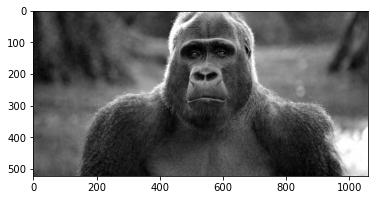

In [102]:
print("Image en niveau de gris : \n")
plt.imshow(img_gray, cmap ="gray")

On a bien un image en niveau de gris, sans faire de gros calcul, seulement en gardant un des trois canaux. C'est une manière simple mais pas si efficace que ça dans certains cas, cela reste un raccourci donc ce n'est pas parfait.

On peut également zoomer sur l'image à l'aide de la fonction gca() qui permet d'accéder aux dimensions des axes du graphique, et axis() qui permet de les modifier. 

L'argument dans axis() est un tableau avec les axes *x* et *y*. On définit un axe des *x* entre 300 et 800, et un axe *y* entre 0 et 370. 

Zoom sur l'image en niveau de gris : 



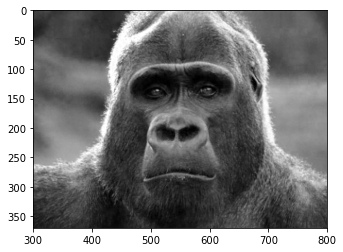

In [73]:
print("Zoom sur l'image en niveau de gris : \n")
plt.gca().axis([300,800,370,0])
plt.imshow(img_gray, cmap = "gray");

En plus de nous permettre d'obtenir des images en niveau de gris, Numpy peut aussi effectuer des opérations sur les tableaux, donc sur les images comme une rotation à 180° :

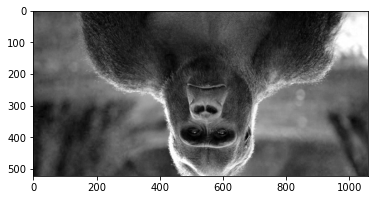

In [131]:
verti = np.flipud(img_gray)
plt.imshow(verti,cmap="gray")

Ou une rotation à 90° :

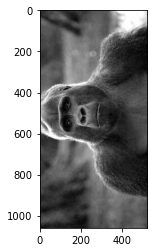

In [132]:
rot = np.rot90(img_gray)
plt.imshow(rot,cmap="gray")

Avec matplotlib, on a redimensionner les axes du graphiques, avec Numpy, on peut redimensionner l'image elle-même :

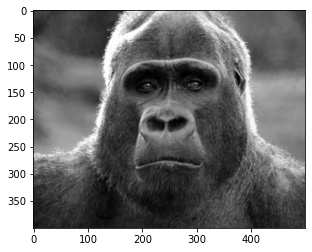

In [133]:
img_reshape = img_gray[:400,300:800,:]
plt.imshow(img_reshape,cmap="gray")

On prend les 400 dernières lignes, les colonnes entre 300 et 799 et les trois canaux RVB, ce qui effectue un rognage de l'image.


## Récapitulatif Numpy et Matplotlib

Si on récapitule avec Numpy on a pu :
* Créer une image pixel par pixel pour former un drapeau, celui de la France
* Passer une image couleur en une image en niveau de gris
* Manipuler une image en niveau de gris pour effectuer quelques opérations simples comme une rotation ou rognage

Et avec matplotlib :
* Ouvrir et afficher une image en niveau de gris et en couleur
* Redimensionner les axes du graphique

# Manipulation d'image avec Pillow

Commentaire/remarque si besoin

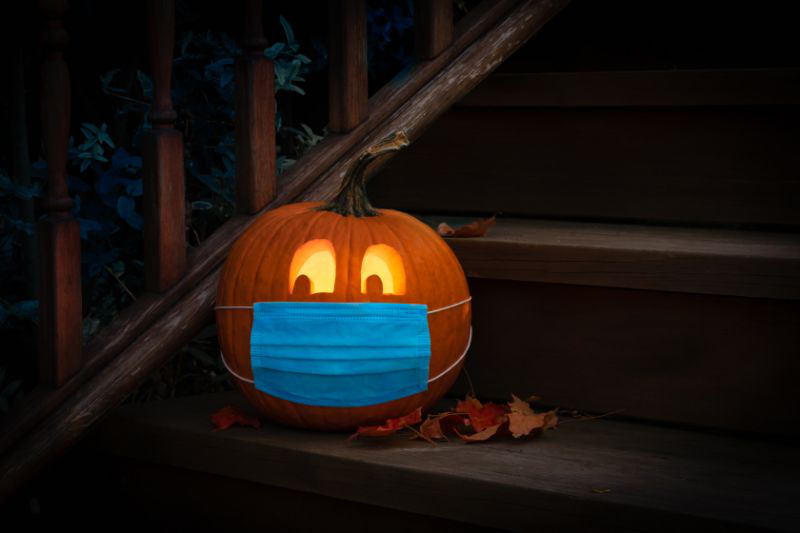

In [8]:
citrouille = Image.open("img/citrouille.jpg")   
display(citrouille)

In [9]:
print("Format: {0}\nSize: {1}\nMode: {2}".format(citrouille.format, 
    citrouille.size, citrouille.mode))

Format: PNG
Size: (800, 533)
Mode: RGB


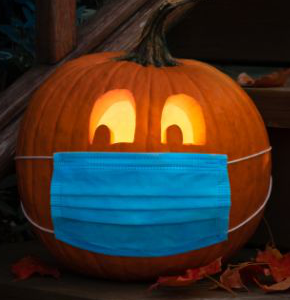

In [10]:
recadrer = citrouille.crop((200, 150, 490, 450))
recadrer.save('img/save/citrouille_recadrer.jpg')
display(recadrer)

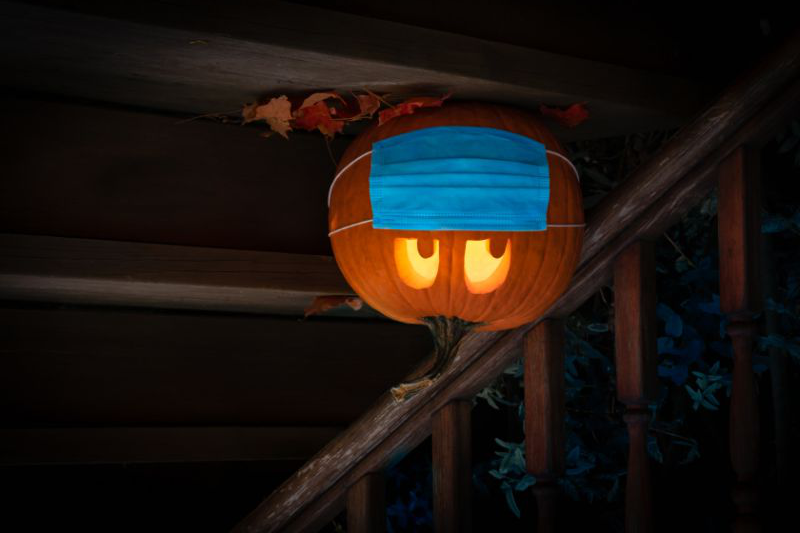

In [11]:
rotation = citrouille.rotate(180)
rotation.save('img/save/citrouille_rotation.jpg')
display(rotation)

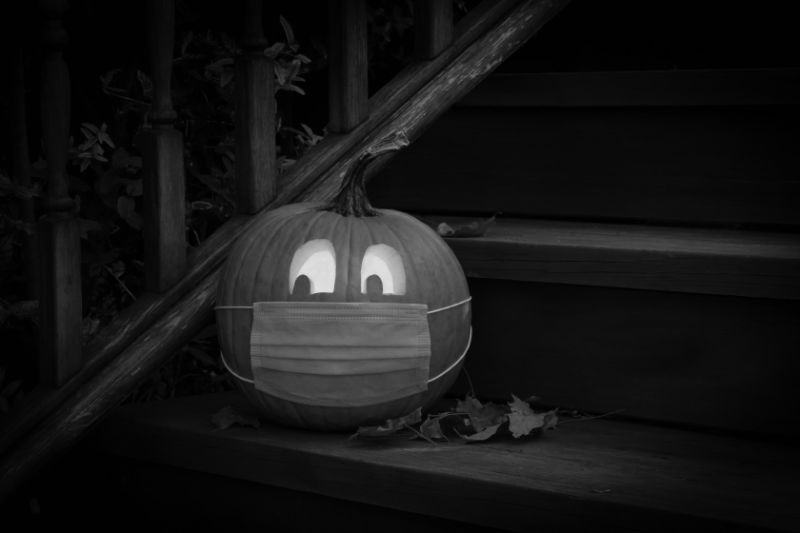

In [12]:
cici = citrouille.convert('LA')
cici.save('img/save/gris.png')
display(cici)

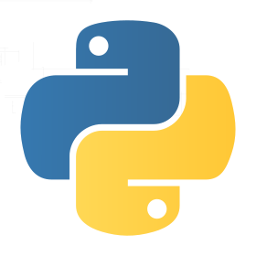

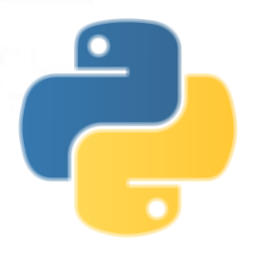

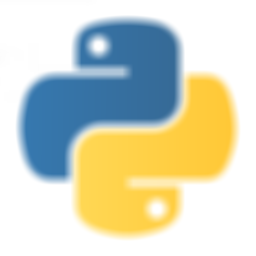

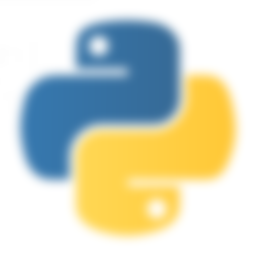

In [13]:
pypy =Image.open('img/python.png')
display(pypy)

flou = pypy.filter(ImageFilter.BLUR)
display(flou)

flou2 = pypy.filter(ImageFilter.BoxBlur(5))
display(flou2)

flou3 = pypy.filter(ImageFilter.GaussianBlur(5))
display(flou3)

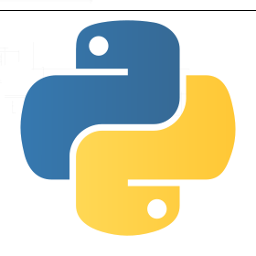

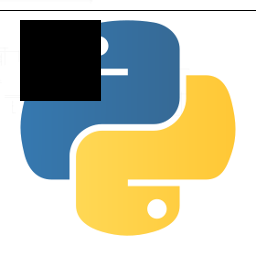

In [14]:


pyt =Image.open('img/python.png')
peint = ImageDraw.Draw(pyt)
peint.rectangle(((0, 10), (1000, 10)), fill="black")
display(pyt)
peint.rectangle(((20, 20), (100, 100)), fill="black")
display(pyt)

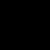

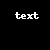

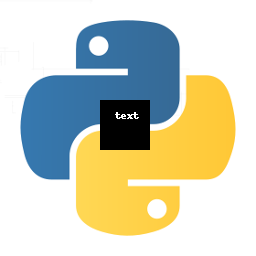

In [15]:
pyt =Image.open('img/python.png')
crea = Image.new('RGBA', (50,50), "black")
display(crea)
peint = ImageDraw.Draw(crea)
peint.text((15, 10), "Python")
pyt.paste(crea, (100, 100))
display(crea)
display(pyt)

# Manipulation d'image avec Scikit-image

Commentaire/remarque si besoin

<class 'numpy.ndarray'>


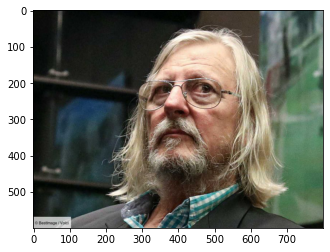

In [16]:
# SCIKIT-IMAGE

didier = io.imread('img/didounet.jpg')
print(type(didier))
plt.imshow(didier);

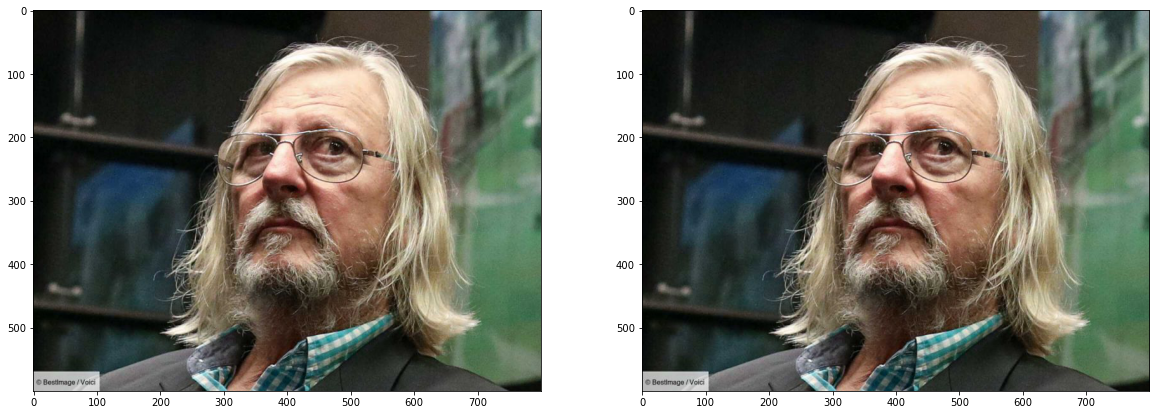

In [17]:

fig, (ax_jet, ax_gray) = plt.subplots(ncols=2, figsize=(20, 23))

ax_jet.imshow(didier)
ax_gray.imshow(didier);

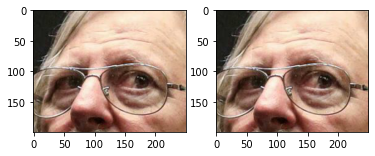

In [18]:
#Rogner 

face = didier[100:300, 300:550]
fig, (ax_jet, ax_gray) = plt.subplots(ncols=2)
ax_jet.imshow(face)
ax_gray.imshow(face);

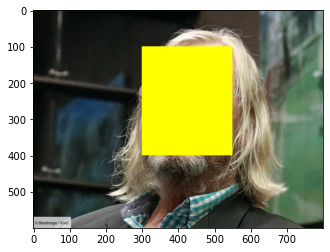

In [19]:
#Rajout d'un rectangle jaune

didier[100:400, 300:550, :] = [255, 255, 0]  # [red, green, blue]
plt.imshow(didier);

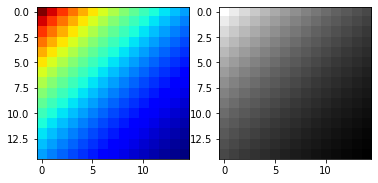

In [20]:
#Taille des pixels et couleurs/contraste

X, Y = np.ogrid[-5:10:1, -5:10:1]
R = np.exp(-(X**1 + Y**1) / 15)
fig, (ax_jet, ax_gray) = plt.subplots(1, 2)
ax_jet.imshow(R, cmap='jet')
ax_gray.imshow(R, cmap='gray');

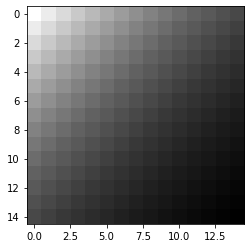

In [21]:
# Interpolation : rend la courbe plus simple tout en faisant coincider

plt.imshow(R, cmap='gray', interpolation='nearest');

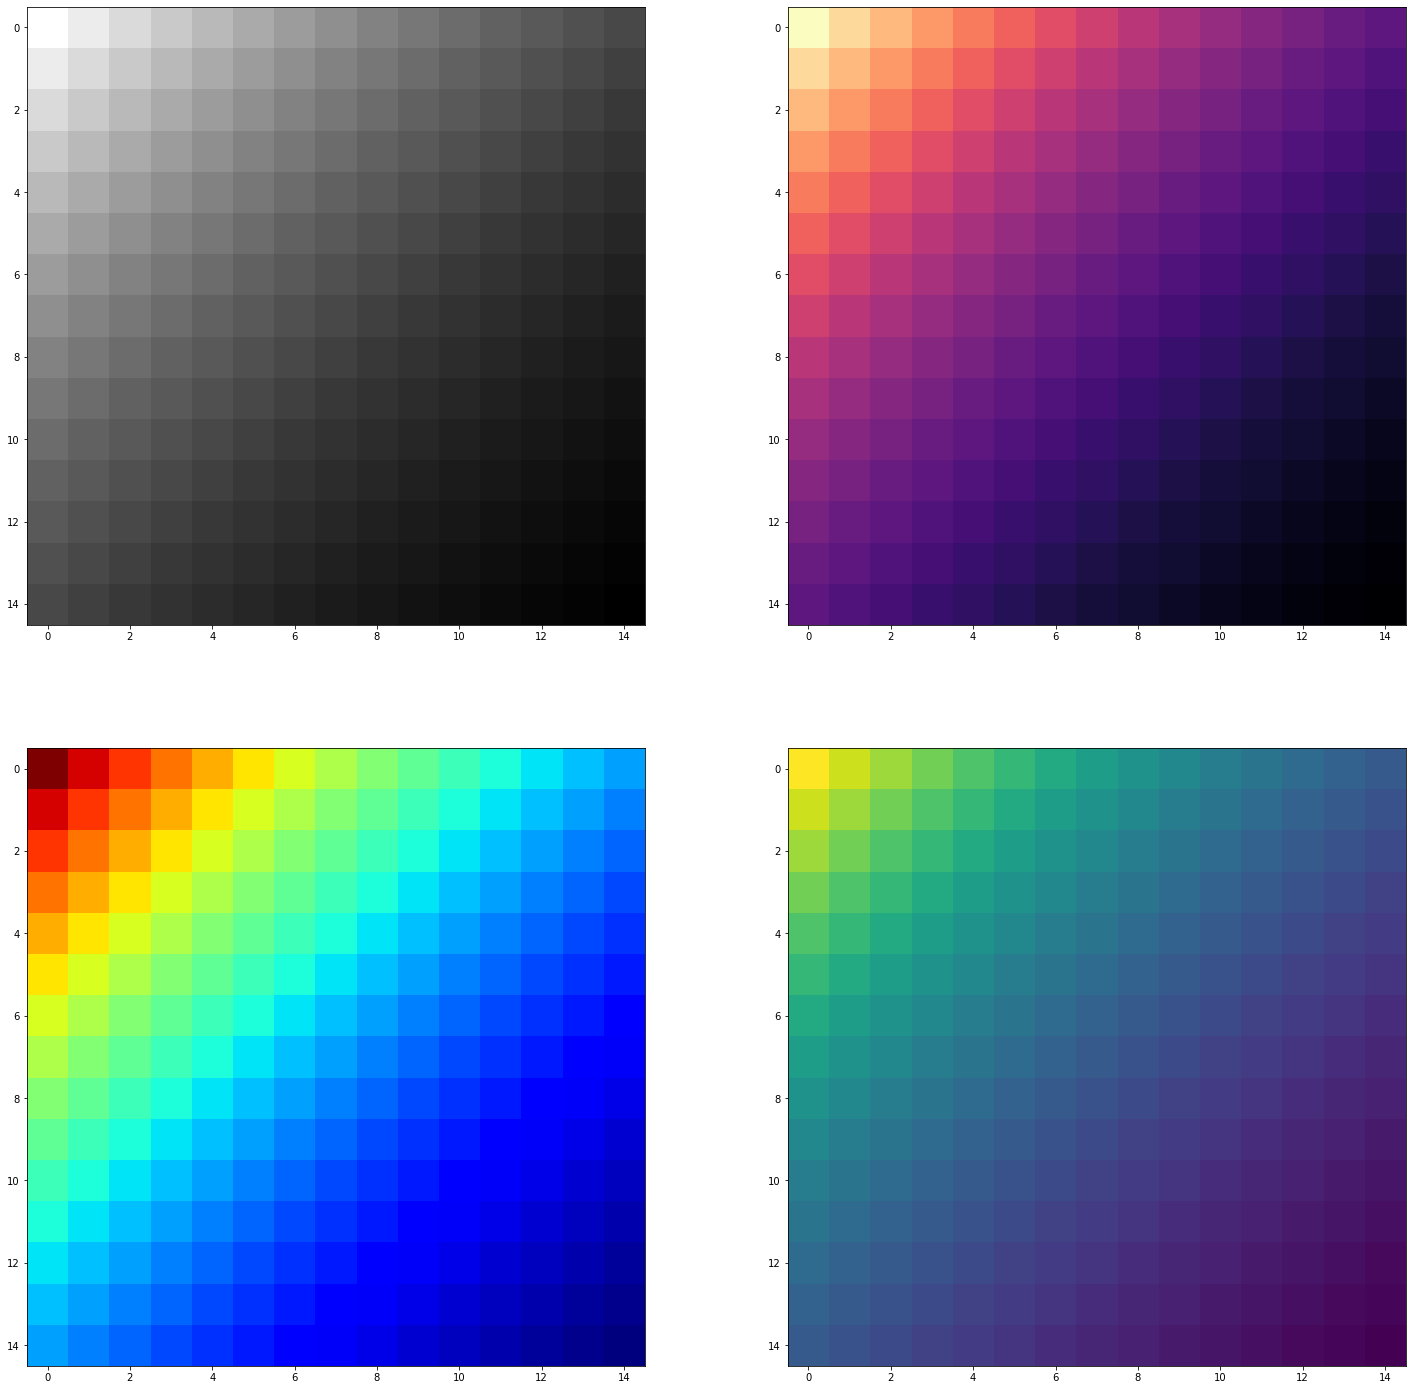

In [22]:
# Nombres de graphes à afficher, position, taille.... Réglage des couleurs (nv gris...)

fig, axes = plt.subplots(2, 2, figsize=(25, 25))
axes[1, 0].imshow(R, cmap='jet')
axes[1, 1].imshow(R, cmap='viridis')
axes[0, 1].imshow(R, cmap='magma')
axes[0, 0].imshow(R, cmap='gray');

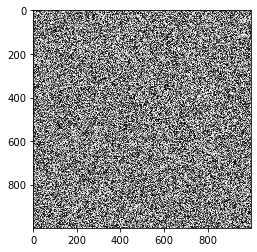

In [23]:
#Image aléatoire avec Niveau de gris
random_image = np.random.random([999, 999])
plt.imshow(random_image, cmap='gray', interpolation='nearest');

# Detection d'image dans une image

Ici, on utilise un détecteur de visage, entrainé sur un fichier specifique aux visages.
*notion de cascade à définir*

Il existe plusieurs fichiers d'entrainemement pour divers objets comme des motos, ou des cellules afin que le détecteur puisse les reconnaitre sur d'autres images.

(à compléter : description des étapes)

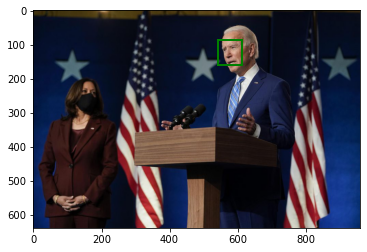

In [26]:
trained_file = data.lbp_frontal_face_cascade_filename()
detector = Cascade(trained_file)
img = mpimg.imread("img/biden.jpg")
detected = detector.detect_multi_scale(img=img,scale_factor=1.2,step_ratio=1,min_size=(60, 60),max_size=(123, 123))
plt.imshow(img)
img_desc = plt.gca()

for patch in detected:
    img_desc.add_patch(patches.Rectangle((patch['c'], patch['r']),patch['width'],patch['height'],fill=False,color='g',linewidth=2))

plt.show()